In [1]:
import pandas as pd # data processing
import numpy as np # linear algebra
from datetime import datetime
import matplotlib.pyplot as plt # used for graphical representation 
import seaborn as sns # used for graphical representation, seaborn is build on the top of mat

In [4]:
df = pd.read_csv("/kaggle/input/temp-refocus/python - python.csv")

#### First Checking

In [7]:
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,X9283,Sales,Quantity,Discount,Returned,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,CA-2017-152156,43047.0,43050.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.96,2,0,0,NaN,NaN,NaN,NaN,NaN
1,CA-2017-152156,43047.0,43050.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Hon Deluxe Fabric Upholstered Stacking Chairs,Rounded Back,731.94,3,0,0,NaN,NaN,NaN,NaN
2,CA-2017-138688,42898.0,42902.0,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0,0,NaN,NaN,NaN,NaN,NaN
3,US-2016-108966,42654.0,42661.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,0,NaN,NaN,NaN,NaN,NaN
4,US-2016-108966,42654.0,42661.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Eldon Fold 'N Roll Cart System,22.368,2,0.2,0,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(10797, 25)

we have 25 variables and 10,797 rows. Let's see if there are duplicate rows in the training data

In [10]:
df = df.drop_duplicates()

From our first look, we see there is duplicates. Let's take a look to others info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9993 non-null   object 
 1   Order Date     9176 non-null   float64
 2   Ship Date      9176 non-null   float64
 3   Ship Mode      9176 non-null   object 
 4   Customer ID    9176 non-null   object 
 5   Customer Name  9176 non-null   object 
 6   Segment        9176 non-null   object 
 7   Country        9176 non-null   object 
 8   City           9176 non-null   object 
 9   State          9176 non-null   object 
 10  Postal Code    9165 non-null   float64
 11  Region         9176 non-null   object 
 12  Product ID     9176 non-null   object 
 13  X9281          9176 non-null   object 
 14  X9282          9176 non-null   object 
 15  X9283          9176 non-null   object 
 16  Sales          9176 non-null   object 
 17  Quantity       9169 non-null   object 
 18  Discount

From info() method we see that the data type is float or object. No null values are present in the data set.
We need to see that the data only from Order ID until Returned.
So we will drop other rows "Unnamed: .." and change the data to the right format.

In [12]:
ndf = df.iloc[:,0:20].drop_duplicates()

In [13]:
ndf.shape

(9993, 20)

Now let's change the format of our data

- > Date | Order Date, Ship Date
- > Int | Postal Code
- > Float | Sales, Discount, Quantity, Returned


Name:

We will also change the name of this colomns, so it will help user understand our data

- X9281 - Product Category
- X9282 - Product
- X9283 - Product Detail

Date Format

In [14]:
ndf["Order Date"] = pd.to_datetime(ndf['Order Date'], unit='D', origin='1899-12-30')
ndf["Ship Date"] = pd.to_datetime(ndf['Ship Date'], unit='D', origin='1899-12-30')

Int format

In [15]:
ndf['Postal Code'] = pd.to_numeric(ndf['Postal Code'], errors = 'coerce').fillna(0).astype(int)

Float Format

In [17]:
ndf[['Sales', 'Quantity', 'Discount', 'Returned']] = ndf[['Sales', 'Quantity', 'Discount', 'Returned']].apply(pd.to_numeric, errors = 'coerce') 

Change the name of our columns

In [18]:
ndf.rename(columns = {'X9281' : 'Product Category', 'X9282' : 'Product', 'X9283' : 'Product Detail'}, inplace = True)

More Deeper Cleansing

In [19]:
unclean_df = ndf[ndf['Order ID'].str.contains(',')]
unclean_df.shape

(817, 20)

From the data we can see there is 817 data, that we fail to read.
When we see the pattern, we can know the problem is because of all data in first column.
That's why we need to do some cleansing to this dataunclean_df.head(2)

In [20]:
unclean_df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Product Category,Product,Product Detail,Sales,Quantity,Discount,Returned
16,"CA-2015-105893,42319,42326,Standard Class,PK-1...",NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,"CA-2015-143336,42243,42248,Second Class,ZD-219...",NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# We spot the pattern
# Since we using "," for split data, we suspect that Product Detail will have "," too. So we will split it by 2
unclean_df_start = pd.DataFrame(unclean_df["Order ID"].str.split(",", n = 15, expand = True)) # Fist data before Product Detail
unclean_df_last = unclean_df_start.iloc[:,-1].str.rsplit(",",4, expand = True) # Rest of data
unclean_ndf = pd.concat([unclean_df_start.iloc[:,:-1], unclean_df_last], axis=1) # Joining first and last data
unclean_ndf.columns = ndf.columns[:] # Change the columns names

We need to clean our data **Unclean_ndf**

In [22]:
unclean_ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 16 to 9992
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          817 non-null    object
 1   Order Date        817 non-null    object
 2   Ship Date         817 non-null    object
 3   Ship Mode         817 non-null    object
 4   Customer ID       817 non-null    object
 5   Customer Name     817 non-null    object
 6   Segment           817 non-null    object
 7   Country           817 non-null    object
 8   City              817 non-null    object
 9   State             817 non-null    object
 10  Postal Code       817 non-null    object
 11  Region            817 non-null    object
 12  Product ID        817 non-null    object
 13  Product Category  817 non-null    object
 14  Product           817 non-null    object
 15  Product Detail    817 non-null    object
 16  Sales             817 non-null    object
 17  Quantity      

In [23]:
# Change the date to int format
unclean_ndf['Order Date'] = pd.to_numeric(unclean_ndf['Order Date'], errors = 'coerce').fillna(0).astype(int)
unclean_ndf['Ship Date'] = pd.to_numeric(unclean_ndf['Ship Date'], errors = 'coerce').fillna(0).astype(int)
# Change the int format to date
unclean_ndf["Order Date"] = pd.to_datetime(unclean_ndf['Order Date'], unit='D', origin='1899-12-30')
unclean_ndf["Ship Date"] = pd.to_datetime(unclean_ndf['Ship Date'], unit='D', origin='1899-12-30')

# Postal Code
unclean_ndf['Postal Code'] = pd.to_numeric(unclean_ndf['Postal Code'], errors = 'coerce').fillna(0).astype(int)

# Change to Float format
unclean_ndf[['Sales', 'Quantity', 'Discount', 'Returned']] = unclean_ndf[['Sales', 'Quantity', 'Discount', 'Returned']].apply(pd.to_numeric, errors = 'coerce') 

In [55]:
clean_df = pd.concat([ndf[~ndf['Order ID'].str.contains(',')], unclean_ndf]) # Joining our data

In this step we already doing the hard part (Cleansing the data). We will make sure to check one more time the columns and rows number that we have

In [42]:
print(clean_df.shape, ndf.shape)

(9993, 20) (9993, 20)


Last, let's drop column that have NA in Sales columns

In [56]:
clean_df = clean_df.dropna(subset=['Sales'])
clean_df = clean_df.loc[clean_df["Discount"] < 1] # Also Drop column that discount more than 100%

### Congratulation! Our first task is done!
Now let's go to the next task

2. **Calculate** net income as a separate column;
3. **Visualize** the dynamics of net profit in the South region.

Need to create new column for net income
we will using 
> **((Quantity - Return) * Sales) * (1 - Discount)**

2. Calculate net income as a separate column;

In [57]:
# Get Net Income
clean_df["Net Income"] = (clean_df["Quantity"] - clean_df["Returned"]) *  clean_df["Sales"] * (1- clean_df["Discount"])

In [53]:
#clean_df.loc[clean_df["Quantity"] > clean_df["Returned"]]
clean_df.loc[clean_df["Discount"] < 1]
#df.loc[(df['Discount'] >= 1000) & (df['Discount'] <= 2000)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Product Category,Product,Product Detail,Sales,Quantity,Discount,Returned,Net Income
316,CA-2015-164259,2015-12-28,2015-12-30,First Class,SP-20860,Sung Pak,Corporate,United States,Philadelphia,Pennsylvania,...,East,OFF-AR-10003373,Office Supplies,Art,Boston School Pro Electric Pencil Sharpener,1670.0,99.136,4.0,0.2,-495669.36
694,CA-2016-119291,2016-05-14,2016-05-17,First Class,JO-15550,Jesus Ocampo,Home Office,United States,Chester,Pennsylvania,...,East,OFF-AR-10003373,Office Supplies,Art,Boston School Pro Electric Pencil Sharpener,1670.0,198.272,8.0,0.2,-2315461.68
852,CA-2017-113747,2017-05-28,2017-06-04,Standard Class,VD-21670,Valerie Dominguez,Consumer,United States,Jackson,Mississippi,...,South,OFF-AR-10003373,Office Supplies,Art,Boston School Pro Electric Pencil Sharpener,1670.0,185.880,6.0,0.0,-1552098.00
1599,CA-2018-158876,2018-11-19,2018-11-21,Second Class,AB-10150,Aimee Bixby,Consumer,United States,Carrollton,Texas,...,Central,OFF-AR-10003373,Office Supplies,Art,Boston School Pro Electric Pencil Sharpener,1670.0,99.136,4.0,0.2,-495669.36
4636,CA-2018-168228,2018-04-27,2018-04-29,First Class,AP-10915,Arthur Prichep,Consumer,United States,Los Angeles,California,...,West,OFF-AR-10003373,Office Supplies,Art,Boston School Pro Electric Pencil Sharpener,1670.0,123.920,4.0,0.0,-620839.20
7031,CA-2017-145548,2017-11-11,2017-11-16,Standard Class,EB-13750,Edward Becker,Corporate,United States,New York City,New York,...,East,OFF-AR-10003373,Office Supplies,Art,Boston School Pro Electric Pencil Sharpener,1670.0,92.940,3.0,0.0,-310419.60
9298,US-2016-163433,2016-04-18,2016-04-22,Second Class,MP-17965,Michael Paige,Corporate,United States,Mcallen,Texas,...,Central,OFF-AR-10003373,Office Supplies,Art,Boston School Pro Electric Pencil Sharpener,1670.0,74.352,3.0,0.2,-247667.68


In [64]:
clean_df.describe()

,Postal Code,Sales,Quantity,Discount,Returned,Net Income
count,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000,8295.000000
mean,55434.039180,236.009534,3.766486,0.157678,0.035805,1001.713161
std,32083.873772,656.975003,2.199554,0.208890,0.185814,3509.251945
min,0.000000,0.444000,1.000000,0.000000,0.000000,0.000000
25%,23320.000000,16.449000,2.000000,0.000000,0.000000,37.263600
50%,59801.000000,51.560000,3.000000,0.200000,0.000000,149.299200
75%,90008.000000,207.984000,5.000000,0.200000,0.000000,639.302400
max,99301.000000,22638.480000,14.000000,0.800000,1.000000,128605.620000


3. Visualize the dynamics of net profit in the South region.

In [65]:
south_df = clean_df[clean_df["Region"] == "South"]

In [74]:
south_df["Net Income"].describe()

count     1369.000000
mean      1119.196117
std       3820.635372
min          0.000000
25%         34.920000
50%        144.960000
75%        704.204800
max      67915.440000
Name: Net Income, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Net Income', ylabel='Density'>

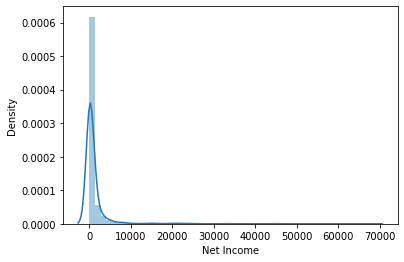

In [68]:
sns.distplot(south_df['Net Income'])

In [ ]:
From the data we can see that south region have big gap with mean 1119
and the standart deviation 3820.